## K-Means Clustering

In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
from math import ceil

# Importing the dataset
dataset = pd.read_csv('hubwaytrips.csv')
# Some useful commands for you to check the dataset
print(dataset.head()) # Prints the first 5 rows of the DataFrame

dataset.info()  # DataFrame summary
dataset.describe() # Statistical summary

   Duration  Morning  Afternoon  Evening  Night  Weekday  Weekend  Male  Age
0       743        0          0        1      0        1        0     0   17
1       872        0          1        0      0        1        0     0   17
2       514        0          1        0      0        1        0     0   17
3      1337        0          1        0      0        1        0     0   17
4       493        1          0        0      0        0        1     0   17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194302 entries, 0 to 194301
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Duration   194302 non-null  int64
 1   Morning    194302 non-null  int64
 2   Afternoon  194302 non-null  int64
 3   Evening    194302 non-null  int64
 4   Night      194302 non-null  int64
 5   Weekday    194302 non-null  int64
 6   Weekend    194302 non-null  int64
 7   Male       194302 non-null  int64
 8   Age        194302 non-null  int64

,Duration,Morning,Afternoon,Evening,Night,Weekday,Weekend,Male,Age
count,194302.000000,194302.000000,194302.000000,194302.000000,194302.000000,194302.000000,194302.000000,194302.000000,194302.000000
mean,716.642114,0.326008,0.398663,0.250486,0.024843,0.828447,0.171553,0.742082,35.302488
std,3067.372173,0.468751,0.489624,0.433294,0.155646,0.376992,0.376992,0.437490,10.978627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
25%,352.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,27.000000
50%,541.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,32.000000
75%,840.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,42.000000
max,644688.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,78.000000


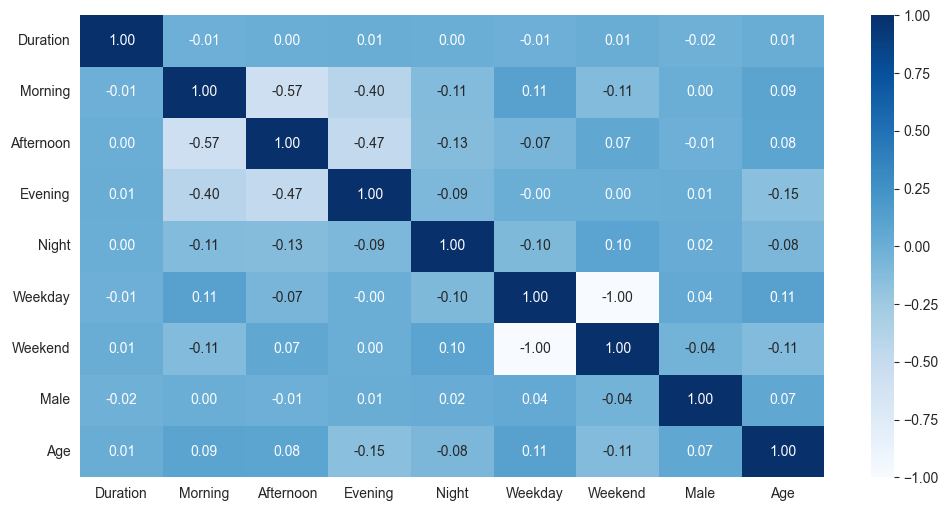

In [6]:
# Check correlation. This gives an idea of the relation between different variables/features
fig, axes = plt.subplots(figsize = (12, 6))
correlation = dataset.corr()
corr_m = sns.heatmap(round(correlation, 2), annot=True, cmap='Blues', ax=axes, fmt='.2f')

In [7]:
# ==== some data processing ready for you ========= #
X = dataset.iloc[:,:].values
X = pd.DataFrame(X)
#randomly select a subset of the original dataset is big
#fix the randomness to be able to reproduce
X = X.sample(n=5000, random_state=1)
X.columns = ['Duration', ' Morning', ' Afternoon', ' Evening', ' Night', ' Weekday', 'Weekend', 'Male', 'Age']
org_X = X # to keep the version before feature scaling for the analysis in Part D

# Feature scaling
X = (X - X.mean()) / X.std()
print(X.head()) # Prints the first 5 rows of the DataFrame

        Duration   Morning   Afternoon   Evening     Night   Weekday  \
51162  -0.284681 -0.694452   -0.814715  1.715409 -0.149968 -2.160556   
178629 -0.184525 -0.694452    1.227177 -0.582835 -0.149968  0.462751   
158120 -0.214876  1.439697   -0.814715 -0.582835 -0.149968  0.462751   
170578 -0.185739  1.439697   -0.814715 -0.582835 -0.149968 -2.160556   
172523  0.099553 -0.694452   -0.814715  1.715409 -0.149968  0.462751   

         Weekend      Male       Age  
51162   2.160556  0.597003 -1.490892  
178629 -0.462751  0.597003  1.537735  
158120 -0.462751  0.597003  0.711746  
170578  2.160556  0.597003  1.262405  
172523 -0.462751  0.597003  1.262405  


In [8]:
# %% ========= PART A: Apply the K-means Algorithm step by step ====== #

# Select the number of clusters #
# Here we selected three to proceed.
k = 3

# Initialize centroids - samples k many data points randomly as the initial centroids
centroids = X.sample(k, random_state=1)

# We need to assign each observation to the nearest centroid
# To do that, first we need to compute the distance between the observations and the centroids

# Function for calculating the distance
def calculate_error(a,b):
    '''
    Given two Numpy Arrays, calculates the sum of squared errors.
    '''
    # Computation of the distance, i.e., the error between two arrays
    

    return error

# Now we can assign the observations to the centroids
# Function for assigning centroids
def assign_centroids(data, centroids):
    '''
    Receives a dataframe of data and centroids and returns a list assigning each observation to a centroid.
    data: a dataframe with all data that will be used.
    centroids: a dataframe with the centroids.
    '''
    n_observations = data.shape[0]
    centroid_assign = []
    centroid_errors = []
    k = centroids.shape[0]

    for observation in range(n_observations):

        # Calculate the error (distance) between each observation and the centroids
        errors = np.array([])
        for centroid in range(k):
            error = calculate_error(centroids.iloc[centroid, :], data.iloc[observation, :])
            errors = np.append(errors, error)

        # Calculate closest centroid & error
        #!!!  IMPLEMENT the assignment  to the closest centroid !!! #
        closest_centroid =
        centroid_error =

        # Assign values to lists
        centroid_assign.append(closest_centroid)
        centroid_errors.append(centroid_error)

    return (centroid_assign, centroid_errors)

#Then we put everything into a loop in order to iterate, reduce the error and finalize the clusters
error = []
WillContinue = True
i = 0
while(WillContinue):
    # PHASE 1 - assigns each observation to the nearest centroid
    # Obtain assigned centroids and the associated error
    X['centroid'], iter_error = assign_centroids(X, centroids)

    # Error in each iteration is printed
    print('total error in iteration ', i, ' is: ', sum(iter_error))
    error.append(sum(iter_error))

    #PHASE 2 - updates the cluster centroids based on the assigned observations
    # Based on the assignment of the observations, recalculate centroids, namely the mean of the observations in the same cluster
    centroids = X.groupby('centroid').agg('mean').reset_index(drop = True)

    # Check if the error has decreased
    if(len(error)<2):
        WillContinue = True # Check if thi si the first iteration
    else:
        if(round(error[i],3) !=  round(error[i-1],3)):
            WillContinue = True # Continue if the error is decreasing
        else: # If we are not able to improve anymore at all we stop
            WillContinue = False
    i = i + 1
print('Number of iterations:', i)

# Plot how the error evolved
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(i), error, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Error')
ax.set_title('Error vs. # Iterations')


# Final centroids together with their error
#you can take a look at this X['centroid'] to see the clusters
X['centroid'], iter_error = assign_centroids(X,centroids)
centroids = X.groupby('centroid').agg('mean').reset_index(drop = True)

colors = {0:'red', 1:'blue', 2:'green'}

# 3D plot with final clusters and their centroids. Ploted features: Duration, Morning and Age
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X.iloc[:,0], X.iloc[:,3], X.iloc[:,8],  marker = 'o',
           c = X['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
ax.scatter(centroids.iloc[:,0], centroids.iloc[:,3], centroids.iloc[:,8],  marker = 'o', s=300,
           c = centroids.index.map(lambda x: colors[x]))
ax.set_title('Clusters of hubway trips')
ax.set_xlabel('Trip duration')
ax.set_ylabel('Evening or not')
ax.set_zlabel('Age')

# END OF PART A #

SyntaxError: invalid syntax (2798137199.py, line 45)

In [ ]:
# %% =========== PART B: Use sklearn package      =========== #
# =========== Decide on the number of clusters =========== #

# !!!! IMPLEMENT the missing parts for using the elbow method !!!!
# the within cluster sum of squared errors can be found with different number of clusters using the KMeans from scikit-learn

#NOTE have random_state=1 in order to control randomness of the process for checking the results

from sklearn.cluster import KMeans
wcss = []
N_max = 30
for i in range(1, N_max):
    #kmeans = KMeans ...
    #...
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, N_max),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('J')
plt.show()

# END OF PART B #

In [ ]:
# %% =========== PART C: Use sklearn package     =========== #
# =========== Apply K-means                    =========== #

# !!!! IMPLEMENT  the k-means algorithm on the data set with 3 clusters =========== #
#NOTE have random_state=1 in order to control randomness of the process for checking the results

#kmeans = KMeans...
#...

# you can check kmeans.inertia_ to see the error (the sum of squared distances)

# !!!!!! IMPLEMENT first add a column for the clusters to the original X dataframe in order to be able to analyze the results based on original values  !!!!!!!
#....

# END OF PART C #

In [ ]:
# %% ======== PART D: RESULTS ANALYSIS ===============#
#Based on part C provide the analysis of results as asked below.
# NOTE: use org_X in order to be able easily relate to the original values of the features



# !!!!!! ANSWER THE QUESTIONS BELOW  !!!!!!
# What percentage of the data is assigned to each cluster?
cluster1per =
cluster2per =
cluster3per =

# For each cluster, provide:
# - The average trip duration in the cluster
avgDuration1 =
avgDuration2 =
avgDuration3 =
# - The percentage of trips made by people above 50 years old in the cluster
perAge50_1 =
perAge50_2 =
perAge50_3 =
#- The percentage of trips made in the evening in the cluster
perEve1 =
perEve2 =
perEve3 =